# Assignment 3
### Due 9/23. Do four of five.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [99]:
nhanes = pd.read_csv("../Data/nhanes_data_17_18.csv")
#nhanes.head()
nhanes.shape # 8366 rows, 198 columns

C:\Users\rdall\AppData\Local\Temp\ipykernel_29260\4169677004.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv("../Data/nhanes_data_17_18.csv")


(8366, 198)

In [5]:
#2x categorical variables: GeneralHealthCondition // TriedToQuitSmoking
nhanes["GeneralHealthCondition"].value_counts()

GeneralHealthCondition
Good         2454
Very good    1544
Fair or      1175
Excellent     619
Poor?         172
Name: count, dtype: int64

In [6]:
sum(nhanes["GeneralHealthCondition"].isna())

2402

In [7]:
print(2454+1544+1175+619+172) # the sum of all values revealed by value_counts()
print(5964 + 2402)              # above sum plus na row count = confirmed all rows accounted for.
print((2402/8366) * 100)

5964
8366
28.71145111164236


In [8]:
nhanes["TriedToQuitSmoking"].value_counts()

TriedToQuitSmoking
1.0    517
0.0    469
Name: count, dtype: int64

In [9]:
sum(nhanes["TriedToQuitSmoking"].isna())

7380

In [10]:
print(7380 + 517 + 469) # True and False for value_counts plus na rows = 8366, all rows accounted for.
print((7380 / 8366) * 100)

8366
88.21420033468802


Starting with "General Health Condition", it appears 28.7% percent of the data are missing.  This in-and-of itself is not suspicious, but it is a significant swath of the data; i.e., not malicious, but a considerable portion of data missing.

Moving to the "Tried to Quit Smoking," over 88% of data are missing; this is not ostensibly suspicious, there is a good reason so much of this data would be "missing" or Nan - those who have never smoked would find the field not-applicable.

In [11]:
pd.crosstab(nhanes["GeneralHealthCondition"], nhanes["TriedToQuitSmoking"])

TriedToQuitSmoking,0.0,1.0
GeneralHealthCondition,,
Excellent,21,33
Fair or,127,152
Good,195,197
Poor?,21,22
Very good,78,80


In [12]:
#nhanes["GenHealthCondNA"] = nhanes["GeneralHealthCondition"].isna()
#nhanes["QuitSmokingNA"] = nhanes["TriedToQuitSmoking"].isna()
#pd.crosstab(nhanes["GenHealthCondNA"], nhanes["QuitSmokingNA"])
nhanes["GeneralHealthCondition"] = nhanes["GeneralHealthCondition"].fillna("NO ANSWER")
nhanes["TriedToQuitSmoking"] = nhanes["TriedToQuitSmoking"].fillna("NO ANSWER")
pd.crosstab(nhanes["GeneralHealthCondition"], nhanes["TriedToQuitSmoking"])

TriedToQuitSmoking,0.0,1.0,NO ANSWER
GeneralHealthCondition,,,
Excellent,21,33,565
Fair or,127,152,896
Good,195,197,2062
NO ANSWER,27,33,2342
Poor?,21,22,129
Very good,78,80,1386


In each category of General Health Condition, more respondents who report trying to quit smoking (1.0) respond in the category than do respondents who report NOT having tried to quit (0.0).

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

[Text(0.5, 1.0, 'KDE')]

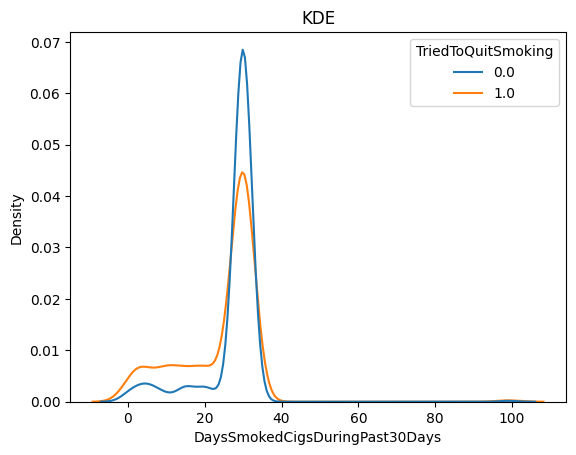

In [13]:
# 1x categorical plus 1x numeric
# TriedToQuitSmoking // DaysSmokedCigsDuringPast30Days

#nhanes["DaysSmokedCigsDuringPast30Days"].describe()
#print("Missing rows: ", sum(nhanes["DaysSmokedCigsDuringPast30Days"].isna()))
# 7352 rows NaN vs. 7380 NaN in Tried to Quit Smoking
# Filter those out...

#type(np.nan) >> a float
temp = nhanes[["DaysSmokedCigsDuringPast30Days", "TriedToQuitSmoking"]]
#temp.shape
temp = temp.loc[temp["TriedToQuitSmoking"] != "NO ANSWER", :]
temp.shape

sns.kdeplot( data=temp, x='DaysSmokedCigsDuringPast30Days', hue="TriedToQuitSmoking", common_norm="False").set(title='KDE')
#plt.show()


There is an interesting phenomenon: after 20 days, the portion of respondents in both the affirmative/negative categories of those respondents who answered the question of having tried to quit smoking spikes.  However, this is not necessarily indicative of anything.  Studies (and personal experience) show relapse after having attempted to quit any addictive substance (in this case, cigarettes) is common.  "Finally quitting for good" is rare, and it usually takes several attempts.  This kde plot is not necessarily indicative of anything, it would be more interesting if there were an additional question or the question were rephrased to collect a datapoint of whether the individual had tried to quit smoking within 30 days (compare that to the number of days cigarettes were smoked within the past 30 days).

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [98]:
def nwe_calc(pred, targ, dataset, band = None, plot = True):

    if band is None:
        interquart = np.quantile(pred, 0.75) - np.quantile(pred, 0.25)
        band = 0.9 * min(np.std(pred), interquart/1.34) * (len(pred)**(-0.2))

    #obs = len(pred)
    M = np.sort(pred.unique()) # already a numpy array due to sorting operation
    pred = pred.to_numpy() # convert to numpy array

    matrixOfSquaredErrors = -(pred.reshape(-1,1)-M.reshape(1,-1)) ** 2
    # yields a broadcasted matrix, M columns, N rows (where N is len(pred))

    noIdeaWhatThisIs = np.exp(matrixOfSquaredErrors/(2*band**2)) / np.sqrt(2*np.pi*band**2)
    # ostensibly plugs the matrix into the Gaussian kernel?

    print("the matrix of squared errors is of shape: ", noIdeaWhatThisIs.shape)  
    print("the matrix of squared errors is of type: ", type(noIdeaWhatThisIs))  
    print("the K matrix is of shape: ", noIdeaWhatThisIs.shape)    
    
    print("the K matrix is of type: ", type(noIdeaWhatThisIs))  

    numerator = targ@noIdeaWhatThisIs # matrix multiplication
    denominator = np.sum(noIdeaWhatThisIs, axis = 0) # still no idea.

    regress = numerator/denominator

    print("regress is of type: ", type(regress))
    """
    # Compute kernel:
    I = -(x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = np.exp(I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )

    # Compute LCLS estimator:
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator
    """

    if plot:
        sns.scatterplot(data=dataset, y='price', x='Yr.Sold', alpha=.05)
        sns.lineplot(x=M, y=regress, color='orange')

    return regress


In [87]:
# from the datasets, need two numericals
# choosing to look at "Yr.Sold" (x) vs "price" (y)

new_data = pd.read_csv("../data/ames_prices.csv")
new_data.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


the matrix of squared errors is of shape:  (2930, 5)
the matrix of squared errors is of type:  <class 'numpy.ndarray'>
the K matrix is of shape:  (2930, 5)
the K matrix is of type:  <class 'numpy.ndarray'>
regress is of type:  <class 'numpy.ndarray'>


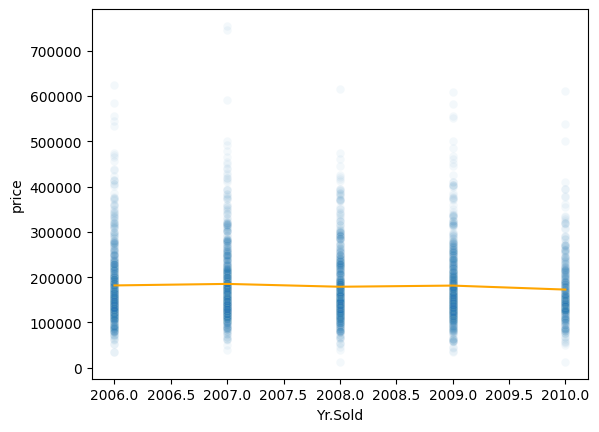

In [97]:
x_axis = new_data["Yr.Sold"]
y_axis = new_data["price"]

lclsReg = nwe_calc(x_axis, y_axis, new_data)

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

<Axes: xlabel='Yr.Sold', ylabel='price'>

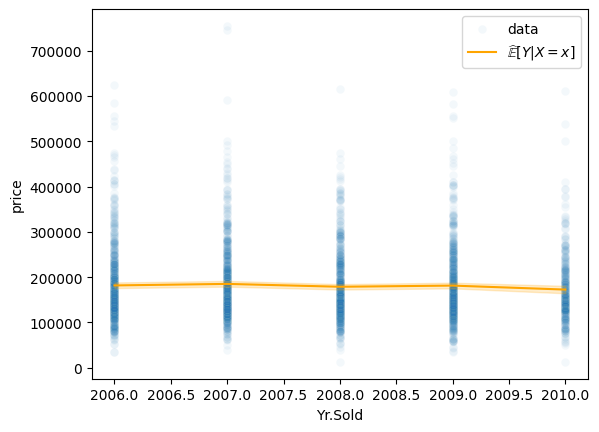

In [77]:
# from the datasets,
# choosing to look at "Yr.Sold" (x) vs "price" (y)

data5 = pd.read_csv("../data/ames_prices.csv")

# sns.scatterplot(data=df, y='price', x='Fireplaces',alpha=.05, label='data')
sns.scatterplot(data=data5, y='price', x='Yr.Sold',alpha=.05, label='data')

# means = df.loc[:,['price','Fireplaces']].groupby('Fireplaces').mean()
means = data5.loc[:, ["price", "Yr.Sold"]].groupby("Yr.Sold").mean()

# sns.lineplot(data=means, x='Fireplaces',y='price',color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')
sns.lineplot(data=data5, x="Yr.Sold", y="price", color="orange", label="$\\widehat{\\mathbb{E}}[Y|X=x]$")

This CEF is not really causal.  It indicates a relatively stable real estate market over the period of time captured by the data, but real estate markets fluctuate based on a number of factors including banking practices subject to regulation, local economic growth/decline, inflation/depression rates of national currency, geographic location, etc.  That said, the relative stability of the system exhibited in the sample data yields a rather tight CEF projection, so as long as the "system" continues as-is without intervention, this CEF analysis can be used to project sale price of a house in a given year.